# Perceptron

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

## 2. Representing a Perceptron

**Task 1**  
- Our `Perceptron` class by default takes two inputs and a pre-defined weight for each input.
- Complete the `__init__()` method inside the `Perceptron` class by creating instance variables `self.num_inputs` and `self.weights` that represent the attributes of a `Perceptron` object.
- Assign the parameters `num_inputs` and `weights` to `self.num_inputs` and `self.weights` respectively.

<br>

**Task 2**  
- Create a `Perceptron` object called `cool_perceptron` (without any arguments) and print it out to see what it looks like.

In [1]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights


cool_perceptron = Perceptron()
print(cool_perceptron)

## 3. Step 1: Weighted Sum

**Task 1**  
- Create a variable called `weighted_sum` to hold the value of the weighted sum and set its starting value to `0`.
- Return `weighted_sum` outside the for loop.

<br>

**Task 2**  
- Let’s go through each input-weight pair and find the weighted sum using indexing.
- For each iteration in the loop, find the product of the input and weight at index `i`, add the result to `weighted_sum`, and store it back in `weighted_sum` to update the value of `weighted_sum`.

<br>

**Task 3**  
- Outside the `Perceptron` class, after the Perceptron object `cool_perceptron` has been created, print out the weighted sum for the inputs `[24, 55]`.
- What is the weighted sum?

In [2]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[2,1]):
        self.num_inputs = num_inputs
        self.weights = weights
        
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i] * inputs[i]
        return weighted_sum

cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))

103


## 4. Step 2: Activation Function

**Task 1**  
- Inside the `.activation()` method, return `1` if the `weighted_sum` is greater than or equal to `0`.

<br>

**Task 2**  
- Inside the `.activation()` method, return `-1` if the `weighted_sum` is less than `0`.

<br>

**Task 3**  
- Print out the result of the method `.activation()` called on `cool_perceptron` if the weighted sum is `52`.

In [4]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
        
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i] * inputs[i]
        return weighted_sum
    
    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1

cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
print(cool_perceptron.activation(52))

79
1


## 5. Training the Perceptron

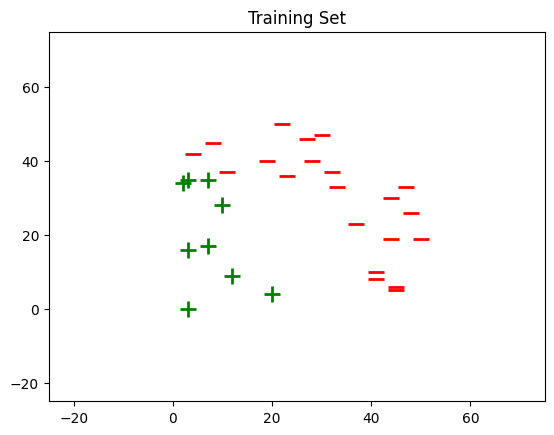

In [6]:
def generate_training_set(num_points):
	x_coordinates = [random.randint(0, 50) for i in range(num_points)]
	y_coordinates = [random.randint(0, 50) for i in range(num_points)]
	training_set = dict()
	for x, y in zip(x_coordinates, y_coordinates):
		if x <= 45-y:
			training_set[(x,y)] = 1
		elif x > 45-y:
			training_set[(x,y)] = -1
	return training_set


training_set = generate_training_set(30)


x_plus = []
y_plus = []
x_minus = []
y_minus = []


for data in training_set:
	if training_set[data] == 1:
		x_plus.append(data[0])
		y_plus.append(data[1])
	elif training_set[data] == -1:
		x_minus.append(data[0])
		y_minus.append(data[1])


fig = plt.figure()
ax = plt.axes(xlim=(-25, 75), ylim=(-25, 75))
plt.scatter(x_plus, y_plus, marker = '+', c = 'green', s = 128, linewidth = 2)
plt.scatter(x_minus, y_minus, marker = '_', c = 'red', s = 128, linewidth = 2)
plt.title("Training Set")
plt.show()

## 6. Training Error

**Task 1**  
- In the `.training()` method, let’s find the perceptron’s error on each inputs in `training_set`.
- First, we need the perceptron’s predicted output for a point. 
- Inside the `for` loop, create a variable called `prediction` and assign it the correct label value using `.activation()`, .`weighted_sum()`, and `inputs` in a single statement.

<br>

**Task 2**  
- Create a variable named `actual` and assign it the actual label for each `inputs` in `training_set`.

<br>

**Task 3**  
- Create a variable called `error` and assign it the value of `actual - prediction`.

In [7]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
        
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
    
    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1
        
    def training(self, training_set):
        for inputs in training_set:
            prediction = self.activation(self.weighted_sum(inputs))
            actual = training_set[inputs]
            error = actual - prediction


cool_perceptron = Perceptron()
print(cool_perceptron.weighted_sum([24, 55]))
print(cool_perceptron.activation(52))

79
1


## 8. The Perceptron Algorithm

- In this exercise, you will continue to work on the `.training()` method. 
- We have made the following changes to this method from the last exercise:
    - `foundLine` = False (a boolean that indicates whether the perceptron has found a line to separate the positive and negative labels)
    - `while not foundLine`: (a `while` loop that continues to train the perceptron until the line is found)
    - `total_error = 0` (to count the total error the perceptron makes in each round)
    - `total_error += abs(error)` (to update the total error the perceptron makes in each round)

**Task 1**  
- If the algorithm doesn’t find an error, the perceptron must have correctly predicted the labels for all points.
- Outside the `for` loop (but inside the `while` loop), change the value of `foundLine` to `True` if `total_error` equals `0`.

<br>

**Task 2**  
- In order to update the weight for each `inputs`, create another `for` loop (inside the existing `for` loop) that iterates a loop variable `i` through a `range` of `self.num_inputs`.

<br>

**Task 3**  
- 

<br>

**Task 4**  
- 

In [9]:
class Perceptron:
    def __init__(self, num_inputs=2, weights=[1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
        
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
    
    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1
        
    def training(self, training_set):
        foundLine = False
        while not foundLine:
            total_error = 0
            for inputs in training_set:
                prediction = self.activation(self.weighted_sum(inputs))
                actual = training_set[inputs]
                error = actual - prediction
                total_error += abs(error)
                for i in range(self.num_inputs):
                    self.weights[i] += error*inputs[i]
            if total_error == 0:
                foundLine = True


cool_perceptron = Perceptron()
small_training_set = {(0,3):1, (3,0):-1, (0,-3):-1, (-3,0):1}
cool_perceptron.training(small_training_set)
print(cool_perceptron.weights)

[-5, 1]


## 9. The Bias Weight

**Task 1**  
- How does this change the code so far? You only have to consider two small changes:
    - Add a 1 to the set of inputs (now there are 3 inputs instead of 2)
    - Add a bias weight to the list of weights (now there are 3 weights instead of 2)
- We’ll automatically make these replacements in the code so you should be good to go!

In [13]:
class Perceptron:
    def __init__(self, num_inputs=3, weights=[1,1,1]):
        self.num_inputs = num_inputs
        self.weights = weights
        
    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum
    
    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1
        
    def training(self, training_set):
        foundLine = False
        while not foundLine:
            total_error = 0
            for inputs in training_set:
                prediction = self.activation(self.weighted_sum(inputs))
                actual = training_set[inputs]
                error = actual - prediction
                total_error += abs(error)
                for i in range(self.num_inputs):
                    self.weights[i] += error*inputs[i]
            if total_error == 0:
                foundLine = True


cool_perceptron = Perceptron()
small_training_set = {(0,3,1):1, (3,0,1):-1, (0,-3,1):-1, (-3,0,1):1}
cool_perceptron.training(small_training_set)
print(cool_perceptron.weights)

[-5, 1, -1]


## 10. Representing a Line

In [15]:
lines = []

class Perceptron:
    def __init__(self, num_inputs=3, weights=[1,1,1]):
        self.num_inputs = num_inputs
        self.weights = weights

    def weighted_sum(self, inputs):
        weighted_sum = 0
        for i in range(self.num_inputs):
            weighted_sum += self.weights[i]*inputs[i]
        return weighted_sum

    def activation(self, weighted_sum):
        if weighted_sum >= 0:
            return 1
        if weighted_sum < 0:
            return -1

    def training(self, training_set):
        foundLine = False
        while not foundLine:
            total_error = 0
        for inputs in training_set:
            prediction = self.activation(self.weighted_sum(inputs))
            actual = training_set[inputs]
            error = actual - prediction
            total_error += abs(error)
            for i in range(self.num_inputs):
                self.weights[i] += error*inputs[i]

        slope = -self.weights[0]/self.weights[1]
        intercept = -self.weights[2]/self.weights[1]
        y1 = (slope * 0) + intercept
        y2 = (slope * 50) + intercept
        lines.append([[0,50], [y1, y2]])

        if total_error == 0:
            foundLine = True

In [ ]:
def generate_training_set(num_points):
	x_coordinates = [random.randint(0, 50) for i in range(num_points)]
	y_coordinates = [random.randint(0, 50) for i in range(num_points)]
	training_set = dict()
	for x, y in zip(x_coordinates, y_coordinates):
		if x <= 45-y:
			training_set[(x,y,1)] = 1
		elif x > 45-y:
			training_set[(x,y,1)] = -1
	return training_set

training_set = generate_training_set(30)

x_plus = []
y_plus = []
x_minus = []
y_minus = []

for data in training_set:
	if training_set[data] == 1:
		x_plus.append(data[0])
		y_plus.append(data[1])
	elif training_set[data] == -1:
		x_minus.append(data[0])
		y_minus.append(data[1])

perceptron = Perceptron()
perceptron.training(training_set)

fig = plt.figure()
ax = plt.axes(xlim=(-25, 75), ylim=(-25, 75))
line, = ax.plot([], [], lw=2)

fig.patch.set_facecolor('#ffc107')

plt.scatter(x_plus, y_plus, marker = '+', c = 'green', s = 128, linewidth = 2)
plt.scatter(x_minus, y_minus, marker = '_', c = 'red', s = 128, linewidth = 2)

plt.title('Iteration: 0')


def animate(i):
    print(i)
    line.set_xdata(lines[i][0])  # update the data
    line.set_ydata(lines[i][1])  # update the data
    return line,

def init():
    line.set_data([], [])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=1, init_func=init, interval=50, blit=True, repeat=False)

plt.show()